In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

# Data
 주어진 데이터를 확인했을 때 기본적으로 categorical data가 많이 존재한다. 따라서 주어진 데이터만으로는 정밀한 예측이 어렵기 때문에 categorical한 변수를 dummy로 바꾸어 correlation matrix를 생성해보려 한다. 일단 데이터가 없는 부분부터 확인하여 데이터를 삽입해주겠다.
 

In [3]:
print('data_train')
display(data_train.head())

display(data_train.keys())
display(data_train.shape)

data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

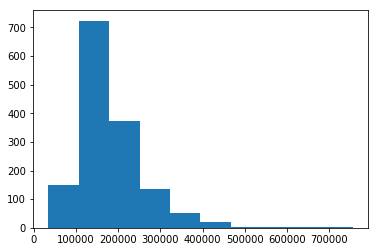

In [4]:
plt.hist(data_train.SalePrice)
plt.show()

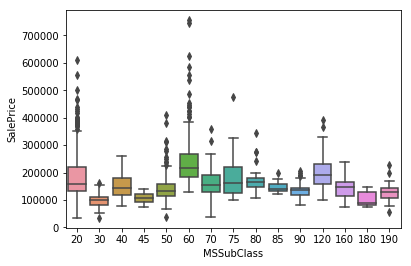

In [5]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=data_train)

In [7]:
tmp = data_train.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


  null값이 들어가있는 데이터를 확인하여 분석한 내용은 아래와 같다. -> 다음에 있는 값은 대체해줄 데이터이다.
 - LotFrontage : 길과의 거리(float) -> mean
 - Alley : 골목 접근 유형(Category) -> 'None'
 - MasVnrType : 벽돌유형(Category) -> 'None'
 - MasVnrArea : 벽돌면적(float) -> mean
 - Bsmt___ : (Category) -> 'None'
 - Electrical -> 'None'
 - FireplaceQu : 벽난로 품질(Category) -> 'None'
 - GarageType : 차고 타입(Category) -> 'None'
 - GarageYrBit : 차고 완공 년도(Int(year)) -> ''
 - GarageFinish : 차고 내부공사 마무리 여부(Category) -> 'None'
 - GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
 - GarageQual : 차고 품질(Category) -> 'None'
 - PoolQC : 풀 품질(Category) -> 'None'
 - Fence : 울타리 품질(Category) -> 'None'
 - MiscFeature : 기타 특징(Category) -> 'None'
 

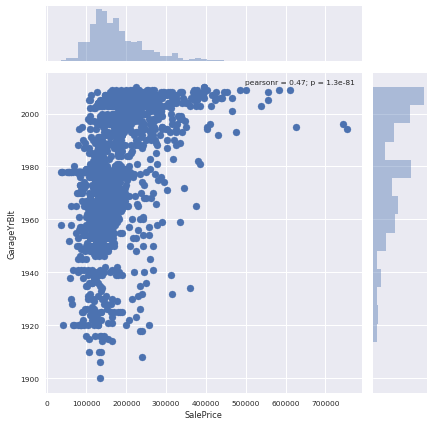

In [34]:
sns.jointplot(x="SalePrice", y="GarageYrBlt", data=data_train)

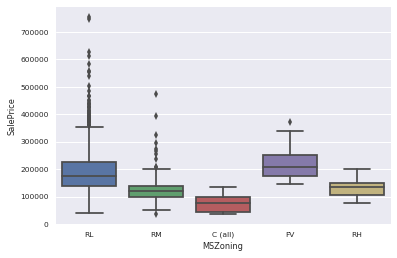

In [41]:
sns.boxplot(x='MSZoning', y='SalePrice', data=data_train)

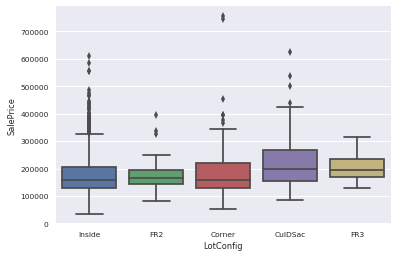

In [42]:
sns.boxplot(x='LotConfig', y='SalePrice', data=data_train)

In [8]:
# 'None' 값을 대체하는 것 대신 실수값이 들어가야 하는 4가지 null columns
data_train.LotFrontage = data_train.LotFrontage.fillna(data_train.LotFrontage.mean())
data_train.MasVnrArea = data_train.MasVnrArea.fillna(data_train.MasVnrArea.mean())
data_train.GarageYrBlt = data_train.GarageYrBlt.fillna(int(data_train.GarageYrBlt.mean()))
data_train.GarageCars = data_train.GarageCars.fillna(0)

# tmp = data_train.isnull().sum()
# for i in tmp.index:
#     if tmp[i] != 0:
#         print(i, tmp[i])

# fill nan to 'None'
data_train = data_train.fillna('None')

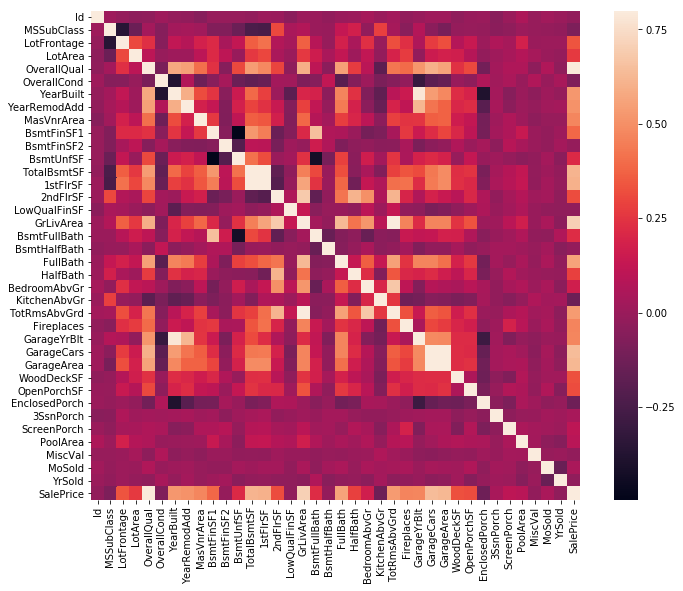

In [9]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

 일단 dummy 변수로 변환하기 전 correlation matrix를 확인하고, SalePrice와 가장 연관성이 높은 10개의 index만 추출하여 heatmap으로 표현해보겠다.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

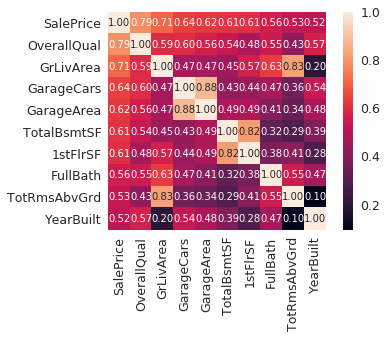

In [10]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice').index
display(cols)
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
# change categorical variable to dummy variable
dummy_train = pd.get_dummies(data_train)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


categorycal data를 one-hot-encoding하여 dummy 변수로 변경하니 index가 81개에서 305개로 증가하였다. 

In [12]:
# SalePrice column을 맨 앞으로 옮기는 과정
cols = list(set(dummy_train.columns.tolist()) - set(['SalePrice']))
cols.insert(0, 'SalePrice')
dummy_train = dummy_train[cols]
display(dummy_train.head())
dummy_train.shape

,SalePrice,LandSlope_Gtl,Exterior2nd_ImStucc,ExterCond_Po,GarageQual_Ex,GarageType_2Types,Exterior2nd_HdBoard,Foundation_Slab,KitchenQual_TA,RoofStyle_Mansard,...,Electrical_FuseF,MiscVal,YearBuilt,BsmtFinType1_LwQ,FireplaceQu_Po,LotConfig_CulDSac,GarageArea,BsmtCond_None,Neighborhood_SawyerW,MasVnrType_BrkCmn
0,208500,1,0,0,0,0,0,0,0,0,...,0,0,2003,0,0,0,548,0,0,0
1,181500,1,0,0,0,0,0,0,1,0,...,0,0,1976,0,0,0,460,0,0,0
2,223500,1,0,0,0,0,0,0,0,0,...,0,0,2001,0,0,0,608,0,0,0
3,140000,1,0,0,0,0,0,0,0,0,...,0,0,1915,0,0,0,642,0,0,0
4,250000,1,0,0,0,0,0,0,0,0,...,0,0,2000,0,0,0,836,0,0,0


(1460, 305)

# One-shot-encoding
 주어진 categorical data들을 모두 one-shot-encoding을 활용해서 수치화하여 SalePrice(Lable)과의 연관성이 0.5 이상인 columns을 구한 code이다. one-show-encoding 전에서 0.5 이상인 column의 개수는 11개였고, 처리 후 column의 개수는 16개로 증가하였다. 위의 코드에서는 나오지 않았지만, 처리 전 0.3 이상인 column의 개수는 19개, 처리 후 0.3 이상인 column의 개수는 59개로 많이 증가하였다.

In [13]:
# Train data(dummy)로 corrmat 생성
corrmat = dummy_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.5)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

SalePrice         1.000000
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
ExterQual_TA     -0.589044
TotalBsmtSF       0.613581
FullBath          0.560664
1stFlrSF          0.605852
BsmtQual_Ex       0.553105
OverallQual       0.790982
TotRmsAbvGrd      0.533723
GrLivArea         0.708624
GarageCars        0.640409
KitchenQual_Ex    0.504094
YearBuilt         0.522897
GarageArea        0.623431
Name: SalePrice, dtype: float64

(15,)

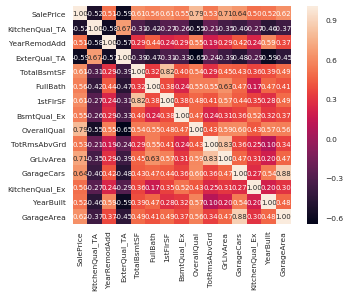

In [14]:
# SalePrice 상관관계의 절댓값이 0.5 이상인 feature 추출된 데이터를 heatmap으로 표시
cm = np.corrcoef(dummy_train[predict_cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=predict_cols.values, xticklabels=predict_cols.values)
plt.show()

In [15]:
predict_cols

Index(['SalePrice', 'KitchenQual_TA', 'YearRemodAdd', 'ExterQual_TA',
       'TotalBsmtSF', 'FullBath', '1stFlrSF', 'BsmtQual_Ex', 'OverallQual',
       'TotRmsAbvGrd', 'GrLivArea', 'GarageCars', 'KitchenQual_Ex',
       'YearBuilt', 'GarageArea'],
      dtype='object')

In [16]:
tmp_cols = dict()
tmp_cols[0] = ['SalePrice', 'KitchenQual_TA', 'FullBath']
tmp_cols[1]  = ['SalePrice', 'GrLivArea', 'OverallQual']
tmp_cols[2]  = ['SalePrice', 'YearRemodAdd', '1stFlrSF']
tmp_cols[3]  = ['SalePrice', 'TotRmsAbvGrd', 'YearBuilt']
tmp_cols[4]  = ['SalePrice', 'KitchenQual_Ex', 'TotalBsmtSF']
tmp_cols[5]  = ['SalePrice', 'GarageCars', 'ExterQual_TA']
tmp_cols[6]  = ['SalePrice', 'GarageArea', 'BsmtQual_Ex']

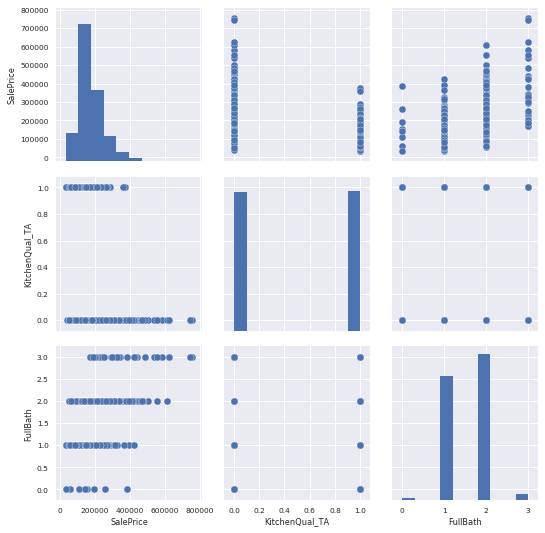

SalePrice         1.000000
KitchenQual_TA   -0.519298
FullBath          0.560664
Name: SalePrice, dtype: float64

In [17]:
sns.pairplot(dummy_train[tmp_cols[0]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[0]])

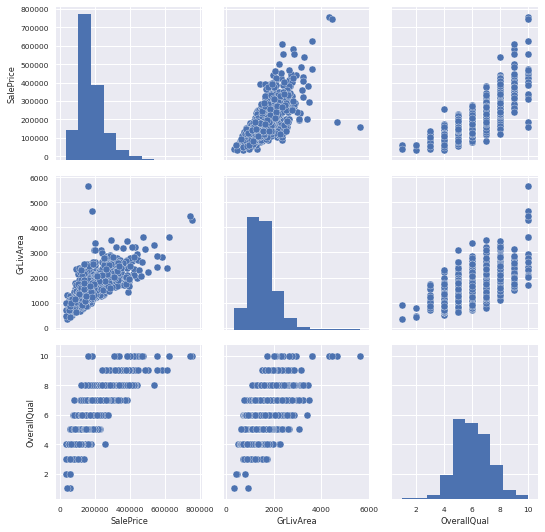

SalePrice      1.000000
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64

In [18]:
sns.pairplot(dummy_train[tmp_cols[1]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[1]])

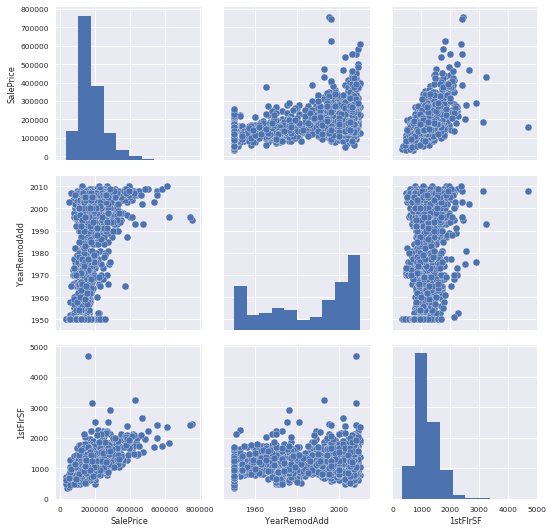

SalePrice       1.000000
YearRemodAdd    0.507101
1stFlrSF        0.605852
Name: SalePrice, dtype: float64

In [19]:
sns.pairplot(dummy_train[tmp_cols[2]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[2]])

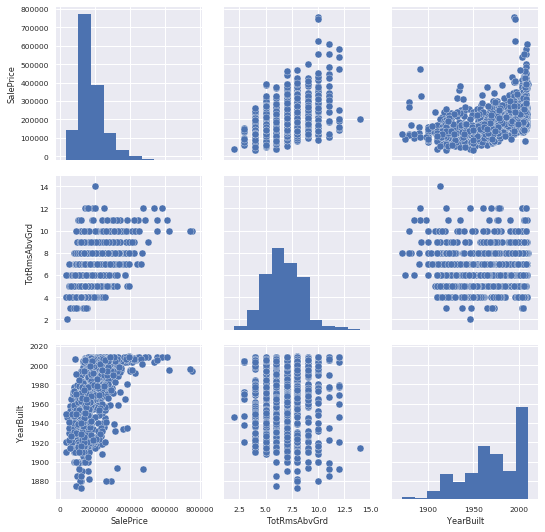

SalePrice       1.000000
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [20]:
sns.pairplot(dummy_train[tmp_cols[3]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[3]])

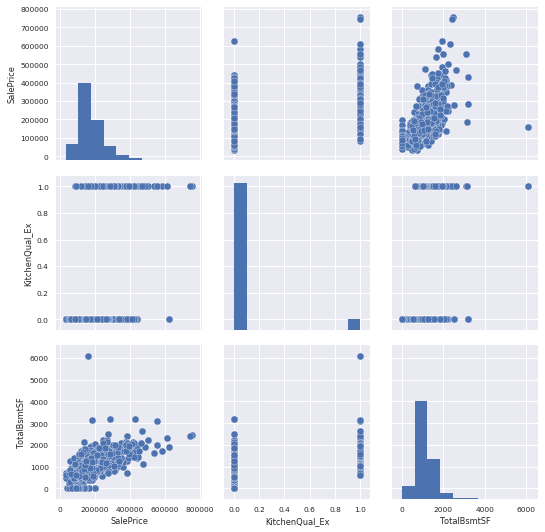

SalePrice         1.000000
KitchenQual_Ex    0.504094
TotalBsmtSF       0.613581
Name: SalePrice, dtype: float64

In [21]:
sns.pairplot(dummy_train[tmp_cols[4]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[4]])

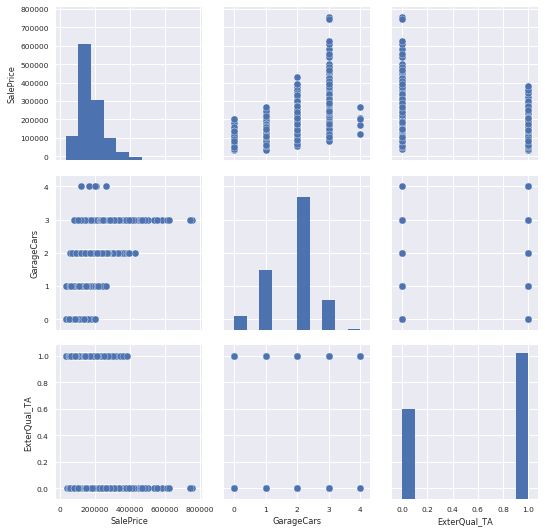

SalePrice       1.000000
GarageCars      0.640409
ExterQual_TA   -0.589044
Name: SalePrice, dtype: float64

In [22]:
sns.pairplot(dummy_train[tmp_cols[5]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[5]])

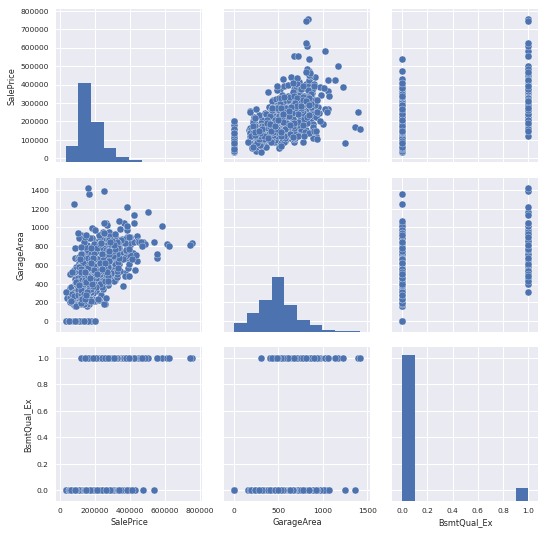

SalePrice      1.000000
GarageArea     0.623431
BsmtQual_Ex    0.553105
Name: SalePrice, dtype: float64

In [23]:
sns.pairplot(dummy_train[tmp_cols[6]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[6]])

MSSubClass 데이터는 categorical data인데 int로 나누어져 있던 데이터였기 때문에 SalePrice에 영향을 주지 않은 것으로 보인다. 따라서 이 데이터를 변경해주는 작업이 필요하다.

In [24]:
# MSSubClass column이 int로 category가 나뉘어져있었음, str로 바꾸고 다시 one-shot-encoding 진행
for i in range(data_train.shape[0]):
    data_train.MSSubClass.loc[i] = str(data_train.MSSubClass.loc[i])

In [25]:
# change categorical variable to dummy variable
dummy_train = pd.get_dummies(data_train)
dummy_train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
# SalePrice column을 맨 앞으로 옮기는 과정
cols = list(set(dummy_train.columns.tolist()) - set(['SalePrice']))
cols.insert(0, 'SalePrice')
dummy_train = dummy_train[cols]
display(dummy_train.head())

,SalePrice,LandSlope_Gtl,Exterior2nd_ImStucc,ExterCond_Po,GarageQual_Ex,GarageType_2Types,Exterior2nd_HdBoard,Foundation_Slab,KitchenQual_TA,RoofStyle_Mansard,...,Electrical_FuseF,MiscVal,YearBuilt,BsmtFinType1_LwQ,FireplaceQu_Po,LotConfig_CulDSac,GarageArea,BsmtCond_None,Neighborhood_SawyerW,MasVnrType_BrkCmn
0,208500,1,0,0,0,0,0,0,0,0,...,0,0,2003,0,0,0,548,0,0,0
1,181500,1,0,0,0,0,0,0,1,0,...,0,0,1976,0,0,0,460,0,0,0
2,223500,1,0,0,0,0,0,0,0,0,...,0,0,2001,0,0,0,608,0,0,0
3,140000,1,0,0,0,0,0,0,0,0,...,0,0,1915,0,0,0,642,0,0,0
4,250000,1,0,0,0,0,0,0,0,0,...,0,0,2000,0,0,0,836,0,0,0


 MSSubClass의 데이터를 변경하고 연관이 0.3 이상인 columns을 검색해봤는데 MSSubclass가 dummy 변수로 바뀌어도 추가되는 column이 존재하지 않았다.

In [27]:
# Train data(dummy)로 corrmat 생성
corrmat = dummy_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.3)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

SalePrice                1.000000
KitchenQual_TA          -0.519298
SaleCondition_Partial    0.352060
BsmtExposure_Gd          0.307298
Foundation_CBlock       -0.343263
YearRemodAdd             0.507101
Foundation_PConc         0.497734
MasVnrType_None         -0.367456
MSSubClass_60            0.377197
ExterQual_TA            -0.589044
TotalBsmtSF              0.613581
KitchenQual_Gd           0.321641
HeatingQC_Ex             0.434543
GarageYrBlt              0.471316
Fireplaces               0.466929
FullBath                 0.560664
1stFlrSF                 0.605852
BsmtFinSF1               0.386420
BsmtQual_Ex              0.553105
OverallQual              0.790982
HeatingQC_TA            -0.312677
OpenPorchSF              0.315856
TotRmsAbvGrd             0.533723
ExterQual_Gd             0.452466
FireplaceQu_None        -0.471908
BsmtFinType1_GLQ         0.434597
GarageType_Attchd        0.335961
ExterQual_Ex             0.451164
FireplaceQu_Gd           0.339329
GarageType_Det

(48,)


 mu = 180921.20 and sigma = 79415.29



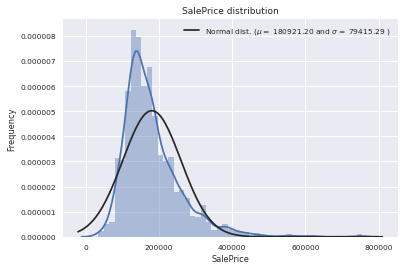

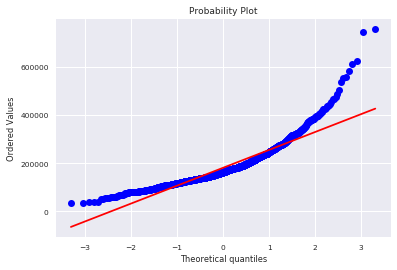

In [28]:
sns.distplot(data_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



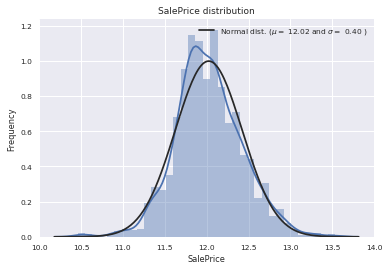

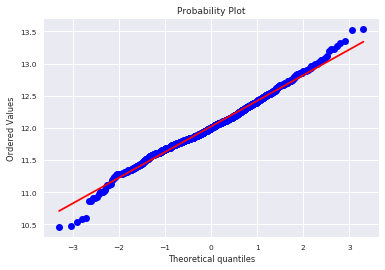

In [29]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
dummy_train["SalePrice"] = np.log1p(dummy_train["SalePrice"])

#Check the new distribution 
sns.distplot(dummy_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dummy_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dummy_train['SalePrice'], plot=plt)
plt.show()

In [30]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)